In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/electron.csv")
data = data.rename(columns={"E1": "E1 [GeV]", "E2": "E2 [GeV]", "px1 ": "px1 [GeV]", "px2": "px2 [GeV]", "py1": "py1 [GeV]", "py2": "py2 [GeV]", "pz1": "pz1 [GeV]", "pz2": "pz2 [GeV]", "phi1": "phi1 [rad]", "phi2": "phi2 [rad]", "pt1": "pt1 [GeV]", "pt2": "pt2 [GeV]", "M": "M [GeV]"})
data.head(10)

,Run,Event,E1 [GeV],px1 [GeV],py1 [GeV],pz1 [GeV],pt1 [GeV],eta1,phi1 [rad],Q1,E2 [GeV],px2 [GeV],py2 [GeV],pz2 [GeV],pt2 [GeV],eta2,phi2 [rad],Q2,M [GeV]
0,147115,366639895,58.71410,-7.31132,10.531000,-57.29740,12.82020,-2.202670,2.177660,1,11.28360,-1.032340,-1.88066,-11.07780,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.15213,-0.579855,-5.11278,4.19242,-1.028420,-3.002840,-1,17.14920,-11.713500,5.04474,11.46470,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.48090,2.041680,22.72460,11.66100,1.420480,2.965600,1,15.82030,-1.472800,2.25895,-15.58880,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.51214,11.887100,63.86620,14.06190,2.218380,1.007210,1,25.12730,4.087860,2.59641,24.65630,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.95284,-14.622700,-59.61210,14.91790,-2.093750,-1.371540,-1,13.88710,-0.277757,-2.42560,-13.67080,2.44145,-2.423700,-1.684810,-1,2.74718
5,147115,366663412,6.39616,-5.45672,-2.090680,-2.60078,5.84352,-0.431551,-2.775710,-1,21.38650,15.169800,-8.87030,-12.18930,17.57280,-0.647450,-0.529120,-1,18.40230
6,147115,366639101,84.50580,8.82436,10.578900,83.37530,13.77610,2.500320,0.875576,1,12.67840,-1.134460,-3.20939,-12.21280,3.40400,-1.989560,-1.910570,-1,65.32390
7,147115,367133576,77.00570,10.00290,9.175450,-75.80000,13.57370,-2.421030,0.742282,1,9.11623,-1.722950,-1.48674,-8.82761,2.27574,-2.064940,-2.429650,1,11.29120
8,147115,368639137,9.68787,1.11192,2.050640,-9.40284,2.33270,-2.102180,1.073940,1,63.45970,-1.858440,12.79460,-62.12870,12.92890,-2.273550,1.715040,1,3.58678
9,147115,367825395,27.88120,11.93900,-18.346200,17.26960,21.88880,0.724032,-0.993887,1,12.92180,-5.026300,11.60260,2.66263,12.64450,0.209050,1.979600,-1,34.26850


## Data Description
- Run: The run number of the event.
- Event: The event number.
- E1, E2: The total energy of the electron (GeV) for electrons 1 and 2.
- px1,py1,pz1,px2,py2,pz2: The components of the momentum of the electron 1 and 2 (GeV).
- pt1, pt2: The transverse momentum of the electron 1 and 2 (GeV).
- eta1, eta2: The pseudorapidity of the electron 1 and 2.
- phi1, phi2: The phi angle of the electron 1 and 2 (rad).
- Q1, Q2: The charge of the electron 1 and 2.
- M: The invariant mass of two electrons (GeV).


## Transverse momentum

A transverse momentum is the sum of the momentum components that are in the planes which are normal to direction of movement of the electron.
The electrons are moving alongside the z-axis, so the transverse momentum is the sum of the x and y vector components. The following code reproduces the same values for the transverse momentum of the two electrons that are in initial data.

In [3]:
# Select one random row

shuffled_data = data.sample(frac=1)
event_1 = shuffled_data.sample(frac=1/data.shape[0])
event_1

,Run,Event,E1 [GeV],px1 [GeV],py1 [GeV],pz1 [GeV],pt1 [GeV],eta1,phi1 [rad],Q1,E2 [GeV],px2 [GeV],py2 [GeV],pz2 [GeV],pt2 [GeV],eta2,phi2 [rad],Q2,M [GeV]
7027,146644,1358260202,4.01776,3.6966,1.48544,-0.520588,3.98389,-0.130304,0.382091,1,32.9106,-16.9607,-23.7873,15.1529,29.2147,0.497851,-2.1902,-1,21.8242


In [4]:
# Function for calculating momentum
def calc_mom(Px , Py, *args, **kwargs):
    Pz = kwargs.get("Pz")
    return np.sqrt(Px ** 2 + Py ** 2 + Pz ** 2)

In [5]:
px1 = event_1["px1 [GeV]"].to_numpy()
py1 = event_1["py1 [GeV]"].to_numpy()
pz1 = event_1["pz1 [GeV]"].to_numpy()
px2 = event_1["px2 [GeV]"].to_numpy()
py2 = event_1["py2 [GeV]"].to_numpy()
pz2 = event_1["pz2 [GeV]"].to_numpy()

tr_momentum1 = calc_mom(px1[0], py1[0], Pz=0).round(5)
tr_momentum2 = calc_mom(px2[0], py2[0], Pz=0).round(5)
print(f"The transverse momentum of the Electron 1 is {tr_momentum1} GeV, while for Electron 2 we have {tr_momentum2} GeV.")

The transverse momentum of the Electron 1 is 3.98389 GeV, while for Electron 2 we have 29.21474 GeV.


### Histograms

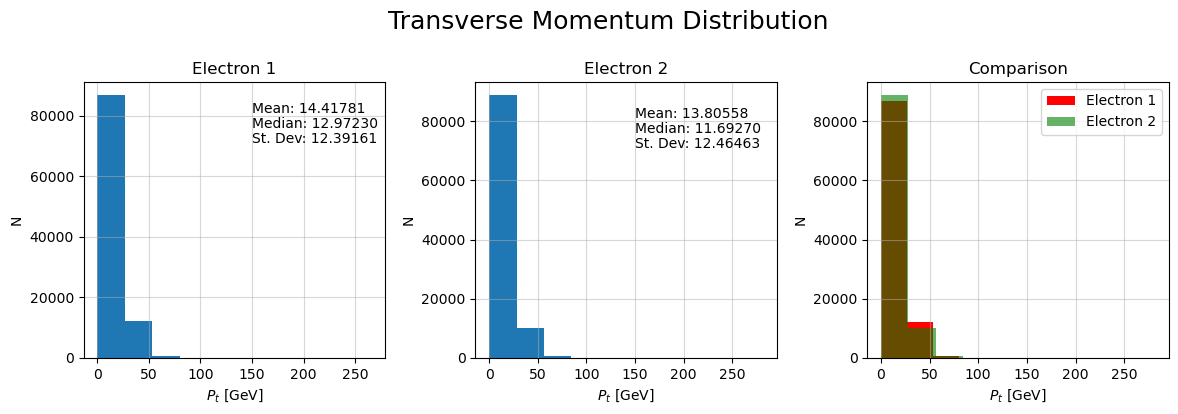

In [20]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, 
                                      ncols=3,
                                       figsize=(14,4))

mean_1 = data["pt1 [GeV]"].mean()
median_1 = data["pt1 [GeV]"].median()
std_1 = data["pt1 [GeV]"].std()

mean_2 = data["pt2 [GeV]"].mean()
median_2 = data["pt2 [GeV]"].median()
std_2 = data["pt2 [GeV]"].std()

ax1.hist(data["pt1 [GeV]"]);
ax2.hist(data["pt2 [GeV]"]);
ax3.hist(data["pt1 [GeV]"], color="r", label="Electron 1");
ax3.hist(data["pt2 [GeV]"], color="g", alpha=0.6, label="Electron 2")

ax1.text(x=150, y=81000, s=f"Mean: {mean_1:.5f}")
ax1.text(x=150, y=76000, s=f"Median: {median_1:.5f}")
ax1.text(x=150, y=71000, s=f"St. Dev: {std_1:.5f}")

ax2.text(x=150, y=81000, s=f"Mean: {mean_2:.5f}")
ax2.text(x=150, y=76000, s=f"Median: {median_2:.5f}")
ax2.text(x=150, y=71000, s=f"St. Dev: {std_2:.5f}")

fig.suptitle("Transverse Momentum Distribution", fontsize=18)
ax1.set(title="Electron 1", xlabel="$P_{t}$ [GeV]", ylabel="N")
ax2.set(title="Electron 2", xlabel="$P_{t}$ [GeV]", ylabel="N")
ax3.set(title="Comparison", xlabel="$P_{t}$ [GeV]", ylabel="N")
ax1.grid(alpha=0.5)
ax2.grid(alpha=0.5)
ax3.grid(alpha=0.5)

plt.legend()
plt.subplots_adjust(top=0.8, wspace=0.3, hspace=0.3)
plt.savefig("../plots/Tranverse_Momentum_Distribution.png", format="png")
plt.show()

Both electrons have similar distributions of their transverse momentums, but Electron 2 tends to have lower transverse momentum than Electron 1.

1) There is higher number of events where Electron 2 has p$_{t}$ in the ranges 0 - 25 GeV.
2) Electron 2 appers less frequently than Electron 1 in the ranges 25 - 50, and 50 - 150 GeV.

We can conclude that Electron 1 is the leading electron (has more transverse momentum) and Electron 2 is the subleading electron.